In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SLNet, SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'
dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
dataset = BrainD(dir_img, dir_mask, label_numbers=target_label_numbers)
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - 2 * n_val
n_test = n_val
train, val, test = random_split(dataset, [n_train, n_val, n_test])

INFO: Creating dataset with 7329 examples


In [5]:
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale

train1 = train
val1 = val
test1 = test
train2 = train
val2 = val
test2 = test

In [6]:
train_loader1 = DataLoader(train1, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
val_loader1 = DataLoader(val1, batch_size=8, shuffle=False, num_workers=8, pin_memory=True, drop_last=True)

writer1 = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [7]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=1,
                                                                target_label_numbers=target_label_numbers,
                                                                dataset=dataset,
                                                                train_loader=train_loader1,
                                                                val_loader=val_loader1,
                                                                writer=writer1)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   6597
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.08777342720346136
Validation round: 100%|██████████| 91/91 [00:05<00:00, 24.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.08110916483533251
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 20.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.07969054178549694
Validation round:  69%|██████▉   | 63/91 [00:03<00:01, 19.30batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.27batch/s]
                                                                    INFO: Validation Dice Loss: 0.08081253053067805
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.07917514320585754
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.0721833715727041
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.06975800355712136
Validation round:  80%|████████  | 73/91 [00:04<00:01, 13.98batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.06793526117945765
Epoch 1/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.27img/s, loss (batch)=0.267] 
INFO: Checkpoint 1 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.0661372286932809
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.06628494791604661
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.06463227011672742
Validation round:  80%|████████  | 73/91 [00:04<00:01, 17.32batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.06070223630784632
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.06165476945730356
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 19.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.06117783323094085
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.06130831181020527
Validation round:  80%|████████  | 73/91 [00:04<00:01, 17.14batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.05990705630936465
Epoch 2/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.88img/s, loss (batch)=0.214] 
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.05983874914082852
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.059616335473217805
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.05990704239069761
Validation round:  68%|██████▊   | 62/91 [00:04<00:01, 20.28batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.046217747196391386
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.05596958084420844
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.056212946199453794
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 24.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.05624792323662685
Validation round:  80%|████████  | 73/91 [00:04<00:00, 20.47batch/s]


Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.05615846026729751
Epoch 3/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 76.08img/s, loss (batch)=0.151] 
INFO: Checkpoint 3 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 23.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.05601004019870863
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.05588898316516981
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.055899404480562104
Validation round:  82%|████████▏ | 75/91 [00:04<00:00, 17.23batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.055894354706282144
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 21.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.055895771380964215
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589432171085379
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 23.94batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589467876560086
Validation round:  90%|█████████ | 82/91 [00:04<00:00, 17.20batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.0558941710617516
Epoch 4/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.87img/s, loss (batch)=0.18]  
INFO: Checkpoint 4 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.055893981767879734
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.74batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589344720919054
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589269142556977
Validation round:  75%|███████▍  | 68/91 [00:04<00:01, 19.52batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589329377635495
Validation round:  96%|█████████▌| 87/91 [00:05<00:00, 19.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.055893080165753
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.055893147875974464
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589327977581338
Validation round:  74%|███████▎  | 67/91 [00:04<00:01, 16.63batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.05589296619643222
Epoch 5/5:  89%|████████▉ | 5865/6597 [01:16<00:09, 76.41img/s, loss (batch)=0.134] 
INFO: Checkpoint 5 saved !


In [8]:
train_loader2 = DataLoader(train2, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
val_loader2 = DataLoader(val2, batch_size=8, shuffle=False, num_workers=8, pin_memory=True, drop_last=True)

writer2 = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [9]:
net4 = SLNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                dataset=dataset,
                                                                train_loader=train_loader2,
                                                                val_loader=val_loader2,
                                                                writer=writer2)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   6597
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.1364600055001594
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.12269881474120277
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 21.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.11908862395928456
Validation round:  81%|████████▏ | 74/91 [00:04<00:00, 17.60batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.1222699250984978
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.11398957702484759
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.1120066890841002
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.10919603697218738
Validation round:  90%|█████████ | 82/91 [00:04<00:00, 17.66batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.10102127975487447
Epoch 1/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.72img/s, loss (batch)=0.326] 
INFO: Checkpoint 1 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.10385941443862495
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 20.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.1047664836540327
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.10543230028597864
Validation round:  49%|████▉     | 45/91 [00:03<00:02, 16.47batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 23.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.10127005447725673
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.1006499938257448
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.10074297355099039
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.10018991318705318
Validation round:  33%|███▎      | 30/91 [00:02<00:06,  9.72batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.91batch/s]
                                                                    INFO: Validation Dice Loss: 0.10099789647610632
Epoch 2/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.95img/s, loss (batch)=0.27]  
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.10038675146771002
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.10004476801707195
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 19.21batch/s]
                                                                    INFO: Validation Dice Loss: 0.10241566983225582
Validation round:  21%|██        | 19/91 [00:01<00:13,  5.31batch/s]


Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.06408654259783882
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.06141827386486661
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 20.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.061501889110921505
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.06107368262914511
Validation round:  21%|██        | 19/91 [00:01<00:10,  7.19batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.06161422659080107
Epoch 3/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 76.02img/s, loss (batch)=0.224] 
INFO: Checkpoint 3 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.06108577066397929
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.06086685737738243
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.06133132043120625
Validation round:   5%|▌         | 5/91 [00:01<00:54,  1.58batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.05943242337677505
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 23.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.05733830432642947
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.0579624687741091
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.16batch/s]
                                                                    INFO: Validation Dice Loss: 0.057069597172213125


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.05733905855443452
Epoch 4/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.85img/s, loss (batch)=0.162] 
INFO: Checkpoint 4 saved !
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.05692158754055317
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.05700626781026086
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.05709993691889794
Epoch 5/5:  41%|████      | 2712/6597 [00:32<00:24, 157.48img/s, loss (batch)=0.149]


Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 23.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.057198247247999844
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.74batch/s]
                                                                    INFO: Validation Dice Loss: 0.056805062670629104
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.05701496517592734
Validation round:  88%|████████▊ | 80/91 [00:04<00:00, 21.52batch/s]


Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.056719099427317524
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.05678955817615593
Epoch 5/5:  89%|████████▉ | 5865/6597 [01:17<00:09, 75.69img/s, loss (batch)=0.15]  
INFO: Checkpoint 5 saved !


configuring combined plots


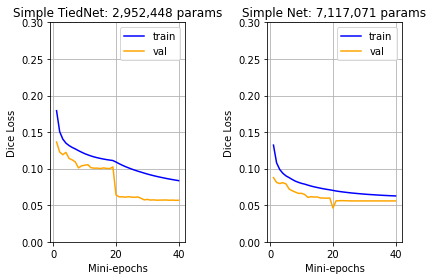

In [10]:
print("configuring combined plots")
domain = len(train_scores4)

x_values = [i+1 for i in range(domain)]
a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.3])
plt.title("Simple TiedNet: 2,952,448 params")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")
plt.plot(x_values, train_scores4, color="blue", label="train")
plt.plot(x_values, val_scores4, color="orange", label="val")
plt.legend()
plt.grid()

domain = len(train_scores3)
a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.3])
plt.title("Simple Net: 7,117,071 params")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")
plt.plot(x_values, train_scores3, color="blue", label="train")
plt.plot(x_values, val_scores3, color="orange", label="val")
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()
plt.close()